In [18]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.mlab as mlab
from helper_functions import *

## Stock analyzer

### Goals:

1. Read all kinds of historic stocks via API
2. Visualize stock charts
3. Write functions to obtain empirical stock signals (e.g. Uwe Lang)
4. Run accurate test using above empirical stock signals using historic data

## 1. Read stock data via API

In [2]:
# List of stocks to read
# Id strings need to be compatible with wallstreet-online url
# i.e.: https://www.wallstreet-online.de/aktien/deutsche-lufthansa-aktie/chart#t:max||s:lines||a:abs||v:day||ads:null
# Maybe we can replace this with ISIN as id
stock_list =["RWE", "Volkswagen", "Daimler", "Henkel", "Linde", "Wirecard"]

In [3]:
stock_data_dataframe = pd.DataFrame()

for stock_str in stock_list:
    # Query stock data from Wallstreet Online
    current_stock_data = get_stock_data("stock", stock_str)
    
    # Append to big dataframe
    stock_data_dataframe = stock_data_dataframe.append(current_stock_data)

In [5]:
stock_data_dataframe.head()

,day_cts,date,opening,max,min,end,volume,t_in_sec,_id,name
0,0,1991-07-18,19.015,19.015,19.015,19.015,126947.0,679788000.0,RWE 1991-07-18,RWE
1,1,1991-07-19,18.882,18.882,18.882,18.882,92658.0,679874400.0,RWE 1991-07-19,RWE
2,4,1991-07-22,18.788,18.788,18.788,18.788,65188.0,680133600.0,RWE 1991-07-22,RWE
3,5,1991-07-23,18.808,18.808,18.808,18.808,80329.0,680220000.0,RWE 1991-07-23,RWE
4,6,1991-07-24,18.551,18.551,18.551,18.551,165694.0,680306400.0,RWE 1991-07-24,RWE


In [6]:
stock_data_dataframe.shape

(39303, 10)

## 2. Plot stock data

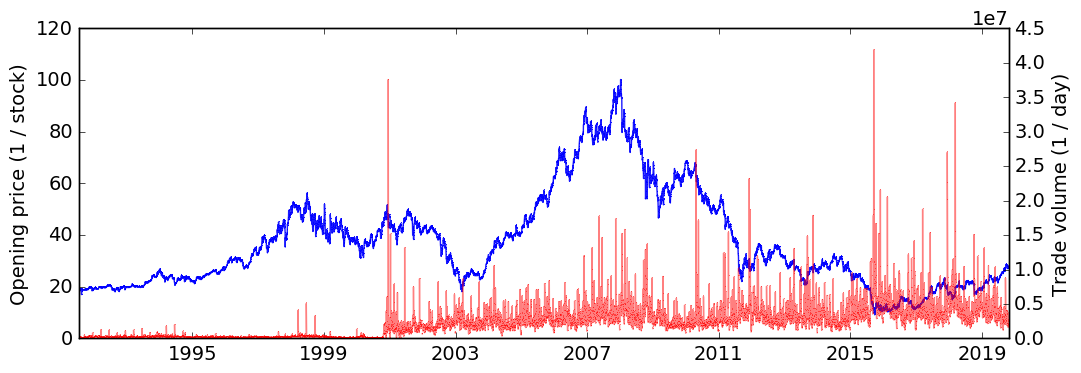

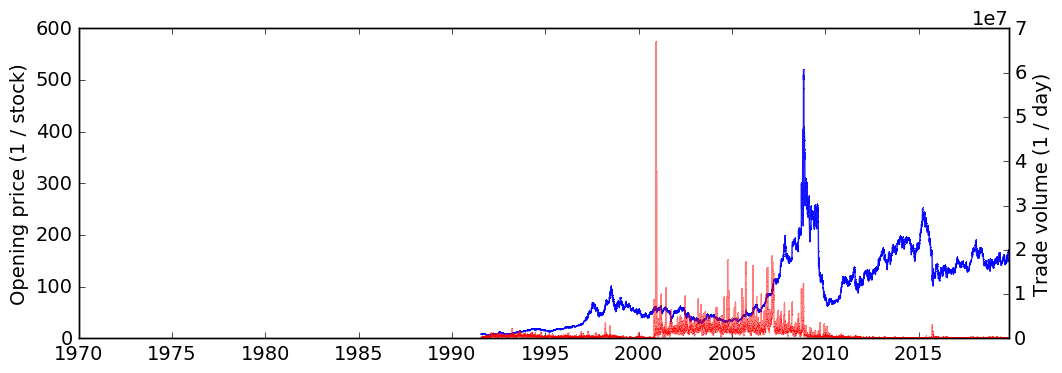

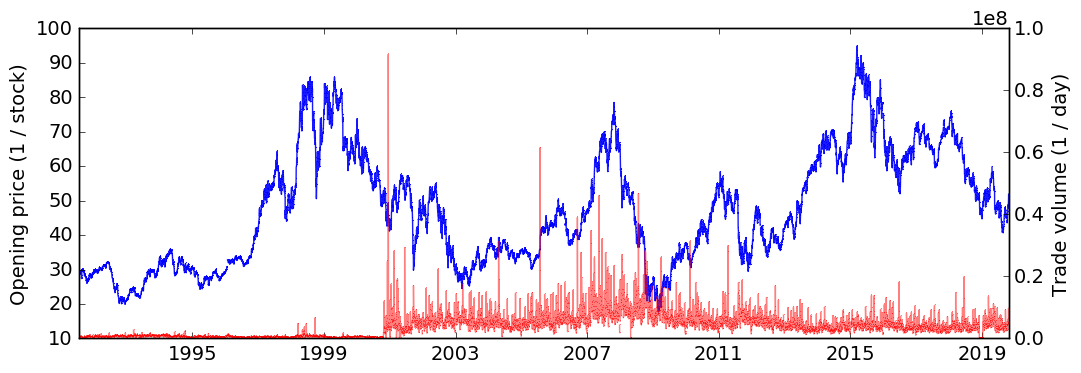

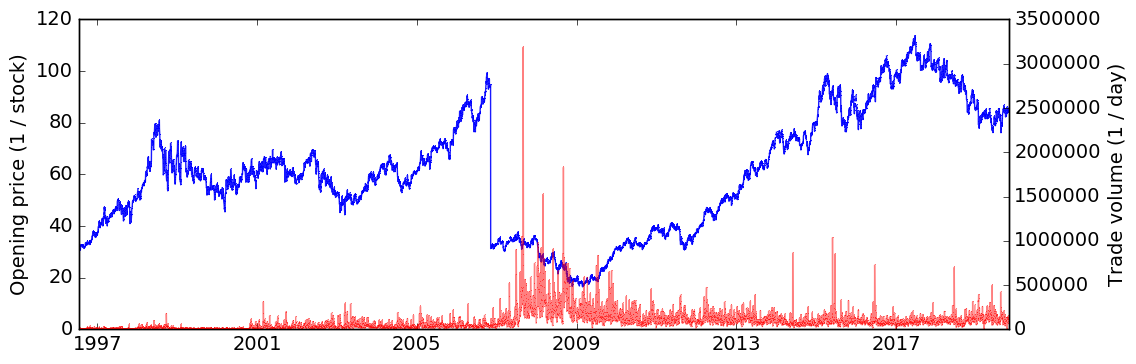

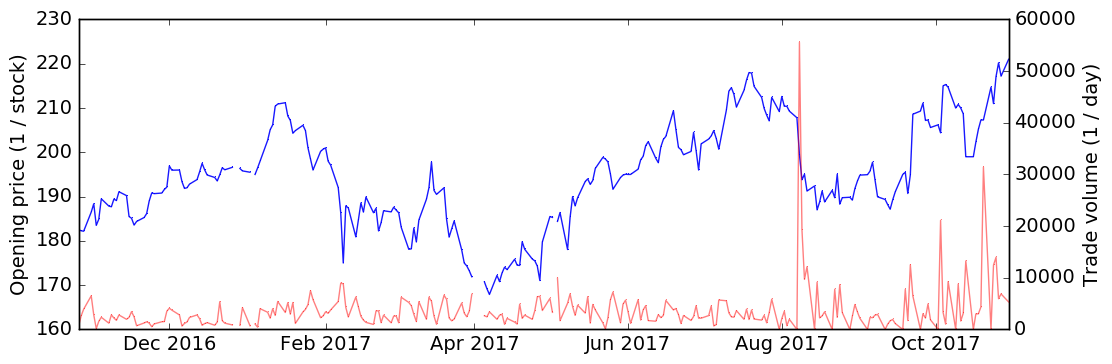

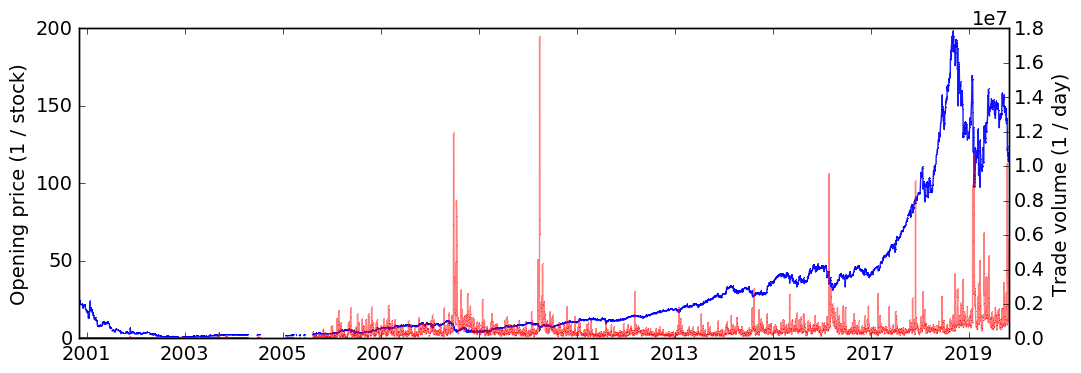

In [66]:
# Plot stocks
plt.rcParams.update({'font.size': 14})

for stock_str in stock_data_dataframe["name"].unique():
    stock_data_dataframe_subset = stock_data_dataframe[stock_data_dataframe["name"] == stock_str]
    
    fig, ax1 = plt.subplots(figsize=(12,4))
    
    x = stock_data_dataframe_subset["date"]
    y1 = stock_data_dataframe_subset["opening"]
    y2 = stock_data_dataframe_subset["volume"]
    
    plt.ylabel("Opening price (1 / stock)")
    ax2 = ax1.twinx()
    ax1.plot(x, y1, ',-', alpha = 0.9)
    
    ax2.plot(x, y2, ',-', color = (1,0,0), alpha = 0.5)
    plt.ylabel("Trade volume (1 / day)")